# Starbucks Reviews Dataset

## About Dataset
This dataset contains a comprehensive collection of consumer reviews and ratings for Starbucks, a renowned coffeehouse chain. The data was collected through web scraping and includes textual reviews, star ratings, location information, and image links from multiple pages on the ConsumerAffairs website. It offers valuable insights into customer sentiment and feedback about Starbucks locations.

## Content:

* Name: The reviewer's name, if available.
* Location: The location or city associated with the reviewer, if provided.
* Date: The date when the review was posted.
* Rating: The star rating given by the reviewer, ranges from 1 to 5.
* Review: The textual content of the review, captures the reviewer's experience and opinions.
* Image Links: Links to images associated with the reviews, if available.

## Source:

https://www.kaggle.com/datasets/harshalhonde/starbucks-reviews-dataset/data

# Importing and loading Data

In [38]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rachana\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rachana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rachana\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [39]:
df= pd.read_csv("reviews_data.csv")

In [40]:
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


# Data exploring and cleaning

In [41]:
df.shape

(850, 6)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         850 non-null    object 
 1   location     850 non-null    object 
 2   Date         850 non-null    object 
 3   Rating       705 non-null    float64
 4   Review       850 non-null    object 
 5   Image_Links  850 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.0+ KB


In [43]:
null_df = df[df.isnull().any(axis=1) ]

In [44]:
null_df

,name,location,Date,Rating,Review,Image_Links
704,James,"Kansas City, MO","Reviewed July 25, 2011",NaN,I just wanted to amend my email the I sent to ...,['No Images']
705,James,"Kansas City, MO","Reviewed July 25, 2011",NaN,"Recently, I have gone to your Starbucks at Bar...",['No Images']
706,Mike,"Revere, ma","Reviewed June 26, 2011",NaN,Upon my first visit to this location on my way...,['No Images']
707,Hughes,"Macclesfield, Other","Reviewed Jan. 13, 2011",NaN,"Recently, British Royal Marines in Iraq wrote ...",['No Images']
708,Sherrilynn,"Jenison, MI","Reviewed Jan. 4, 2011",NaN,"On the way to catch our plane, we got a medium...",['No Images']
...,...,...,...,...,...,...
845,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...,['No Images']
846,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",NaN,No Review Text,['No Images']
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",['No Images']
848,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",NaN,No Review Text,['No Images']


In [45]:
train = df.dropna(axis=0).reset_index()

In [46]:
train.shape

(705, 7)

In [47]:
test = null_df

In [48]:
test.shape

(145, 6)

# Data Visualisation

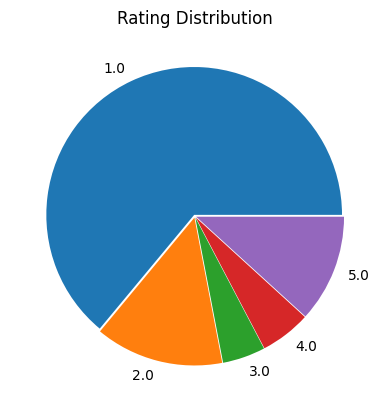

In [49]:
rating = train["Rating"].value_counts().sort_index()
plt.pie(rating, labels=rating.index,explode=[0.01,0.01,0.01,0.01,0.01] )
plt.title('Rating Distribution')
plt.show()

# Data Preprocessing

In [84]:
text = train["Review"].to_list()
text[2]

'I just wanted to go out of my way to recognize a Starbucks employee Billy at the Franklin Park location! I was running late to work & placed an order at the wrong location and not only did he make my order with a smile he made it within 60 seconds! Thank you SOO much I was having a bad morning and people like you just make this world a better place.'

In [51]:
preprocessed_samples = []

stop_words = set(stopwords.words('english'))

for text in text:
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [re.sub(r'[^\w\s]', '', word) for word in tokens]
    filtered_tokens = [word for word in tokens if word not in stop_words]
    preprocessed_text = ' '.join(filtered_tokens)
    preprocessed_samples.append(preprocessed_text)



In [52]:
df = pd.DataFrame({'Preprocessed Text': preprocessed_samples})
df.head()

,Preprocessed Text
0,amber ladonna starbucks southwest parkway alwa...
1,starbucks fire station 436 altamonte springs...
2,wanted go way recognize starbucks employee bil...
3,friend starbucks card work thankful worker ...
4,kick drinking 5 cups warm water work instaca...


In [53]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_samples)

# Data Splitting

In [54]:
label = train["Rating"]
label

0      5.0
1      5.0
2      5.0
3      5.0
4      5.0
      ... 
700    1.0
701    3.0
702    1.0
703    1.0
704    5.0
Name: Rating, Length: 705, dtype: float64

In [55]:
Input = df["Preprocessed Text"]
Input

0      amber ladonna starbucks southwest parkway alwa...
1        starbucks fire station 436 altamonte springs...
2      wanted go way recognize starbucks employee bil...
3      friend starbucks card  work  thankful worker  ...
4       kick drinking 5 cups warm water  work instaca...
                             ...                        
700    ordered via starbucks coffee online  received ...
701    name ric    journalist profession  sending let...
702                         bagel ice cold  cut toasted 
703    morning monday  august 15  2011  645  coworker...
704    found coffee starbucks overrated taste survey ...
Name: Preprocessed Text, Length: 705, dtype: object

In [56]:
X_train, X_test, y_train, y_test = train_test_split(Input, label, test_size=0.2, random_state=42)


# Data Modeling

In [57]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

**Multinomial naive_bayes**

In [58]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [59]:
y_pred = nb_classifier.predict(X_test_tfidf)

In [60]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.5957446808510638
Classification Report:
               precision    recall  f1-score   support

         1.0       0.60      1.00      0.75        84
         2.0       0.00      0.00      0.00        19
         3.0       0.00      0.00      0.00         8
         4.0       0.00      0.00      0.00         8
         5.0       0.00      0.00      0.00        22

    accuracy                           0.60       141
   macro avg       0.12      0.20      0.15       141
weighted avg       0.35      0.60      0.44       141



d:\Projects\Review\sa\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Projects\Review\sa\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Projects\Review\sa\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**RandomForestClassifier**

In [61]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the TF-IDF transformed data
rf_classifier.fit(X_train_tfidf, y_train)

# Transform the test data using the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Make predictions on the test data
y_predi = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_predi)
classification_report_str = classification_report(y_test, y_predi)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.6595744680851063
Classification Report:
               precision    recall  f1-score   support

         1.0       0.66      1.00      0.79        84
         2.0       0.00      0.00      0.00        19
         3.0       0.00      0.00      0.00         8
         4.0       0.00      0.00      0.00         8
         5.0       0.69      0.41      0.51        22

    accuracy                           0.66       141
   macro avg       0.27      0.28      0.26       141
weighted avg       0.50      0.66      0.55       141



d:\Projects\Review\sa\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Projects\Review\sa\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Projects\Review\sa\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Since data is imbalance, **resampling technique** used.  

In [62]:
labels =train["Rating"].to_list()
# Separate data by class labels
class_1 = [preprocessed_samples[i] for i in range(len(preprocessed_samples)) if labels[i] == 1]
class_2 = [preprocessed_samples[i] for i in range(len(preprocessed_samples)) if labels[i] == 2]
class_3 = [preprocessed_samples[i] for i in range(len(preprocessed_samples)) if labels[i] == 3]
class_4 = [preprocessed_samples[i] for i in range(len(preprocessed_samples)) if labels[i] == 4]
class_5 = [preprocessed_samples[i] for i in range(len(preprocessed_samples)) if labels[i] == 5]

# Upsample minority classes (classes 2, 3, 4, and 5)
class_2_upsampled = resample(class_2, n_samples=len(class_1), random_state=42)
class_3_upsampled = resample(class_3, n_samples=len(class_1), random_state=42)
class_4_upsampled = resample(class_4, n_samples=len(class_1), random_state=42)
class_5_upsampled = resample(class_5, n_samples=len(class_1), random_state=42)

# Combine resampled classes
resampled_text = class_1 + class_2_upsampled + class_3_upsampled + class_4_upsampled + class_5_upsampled
resampled_labels = [1] * len(class_1) + [2] * len(class_2_upsampled) + [3] * len(class_3_upsampled) + [4] * len(class_4_upsampled) + [5] * len(class_5_upsampled)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(resampled_text, resampled_labels, test_size=0.2, random_state=42)

# Initialize a TF-IDF vectorizer (you can try other feature extraction techniques)
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Initialize a Random Forest classifier (you can try other classifiers)
rf_class_re = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the TF-IDF transformed data
rf_class_re.fit(X_train_tfidf, y_train)

# Transform the test data using the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Make predictions on the test data
y_pred2 = rf_class_re.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred2)
classification_report_str = classification_report(y_test, y_pred2)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)


Accuracy: 0.9689578713968958
Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.95      0.93       103
           2       0.99      0.94      0.96        86
           3       1.00      1.00      1.00        85
           4       1.00      1.00      1.00        76
           5       0.96      0.96      0.96       101

    accuracy                           0.97       451
   macro avg       0.97      0.97      0.97       451
weighted avg       0.97      0.97      0.97       451



In [87]:
y_pred2
X_test[5]

'starbucks daily coffee good great  order small coffee black cream sugar  like taste way  baristas efficient friendly  think peet better coffee many az '

In [72]:
import pickle 
file = open ('model_predict.pkl','wb')
pickle.dump(rf_class_re, file)

file = open ('tfidf_vectorizer.pkl','wb')
pickle.dump(tfidf_vectorizer, file)

**Using SentimentIntensityAnalyzer**

In [63]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rachana\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [64]:
preprocessed_samples[0]

'amber ladonna starbucks southwest parkway always warm welcoming  always smile voice greet drivethru  customer service always spoton  always get order right smile  would actually give 5 stars available '

In [65]:
w=[]
r = []
scores = []

for tex in range(0,len(preprocessed_samples)): 
    sentiment_scores = sia.polarity_scores(preprocessed_samples[tex])
    

    # Map sentiment scores to a 1 to 5 scale
    if sentiment_scores['compound'] < 0.45:
        score = 1
    elif sentiment_scores['compound'] < 0.65:
        score = 2
    elif sentiment_scores['compound'] < 0.7:
        score = 3
    elif sentiment_scores['compound'] < 0.8:
        score = 4
    else:
        score = 5
    
    scores.append(score)
    
    if score != train["Rating"][tex]:
        w.append(tex)
    else:
        r.append(tex) 
        
    
    
print("Wrongly detected = ", len(w))
print("Rightly detected = ", len(r))
print("scores: ", len(scores))
accuracy = (len(r)/len(scores))*100
print("accuracy: ", accuracy)

Wrongly detected =  329
Rightly detected =  376
scores:  705
accuracy:  53.333333333333336


In [66]:
Result = pd.DataFrame({"Text":text, "Rating": scores, "Actual Rating": train["Rating"]})

In [67]:
Result.head()

,Text,Rating,Actual Rating
0,i found the coffee at starbucks overrated and ...,5,5.0
1,i found the coffee at starbucks overrated and ...,5,5.0
2,i found the coffee at starbucks overrated and ...,1,5.0
3,i found the coffee at starbucks overrated and ...,5,5.0
4,i found the coffee at starbucks overrated and ...,5,5.0


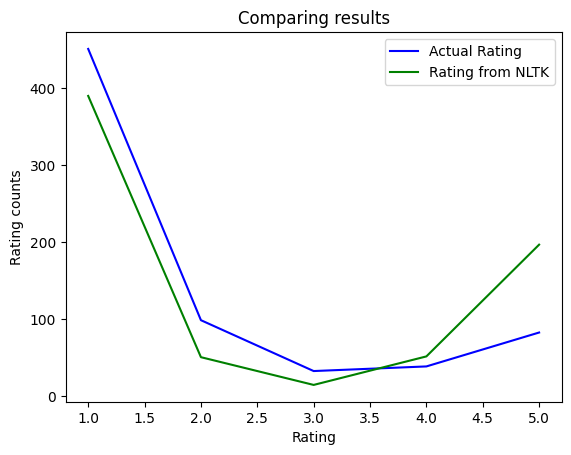

In [68]:
plt.plot( Result["Actual Rating"].value_counts().sort_index().index,Result["Actual Rating"].value_counts().sort_index() ,color="b", label = "Actual Rating")
plt.plot(Result["Rating"].value_counts().sort_index().index,Result["Rating"].value_counts().sort_index(),color="g", label = "Rating from NLTK" )
plt.title("Comparing results")
plt.xlabel("Rating")
plt.ylabel("Rating counts")
plt.legend()
plt.show()

tested on other data

In [69]:
text1 = null_df["Review"].to_list()


In [70]:
rev = tfidf_vectorizer.transform(text1)

In [71]:
rf_class_re.predict(rev)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2])